In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


__step:__ represents a unit of time where 1 step equals 1 hour

__type:__ type of online transaction

__amount:__ the amount of the transaction

__nameOrig:__ customer starting the transaction

__oldbalanceOrg:__ balance before the transaction

__newbalanceOrig:__ balance after the transaction

__nameDest:__ recipient of the transaction

__oldbalanceDest:__ initial balance of recipient before the transaction

__newbalanceDest:__ the new balance of recipient after the transaction

__isFraud:__ fraud transaction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No Null values in the data set

In [6]:
import seaborn as sns


<Axes: xlabel='type', ylabel='amount'>

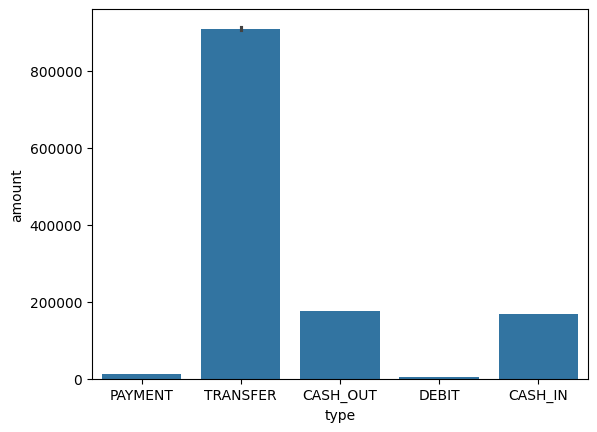

In [7]:
sns.barplot(df, x="type", y="amount")

The largest volume by payment type is through transfer

<Axes: xlabel='type', ylabel='count'>

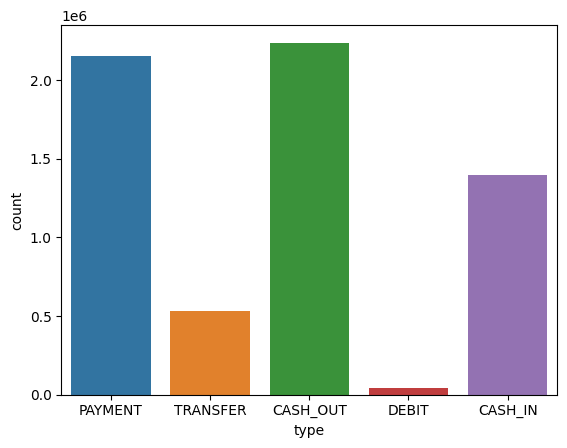

In [8]:
sns.countplot(x='type',data=df, hue = 'type')

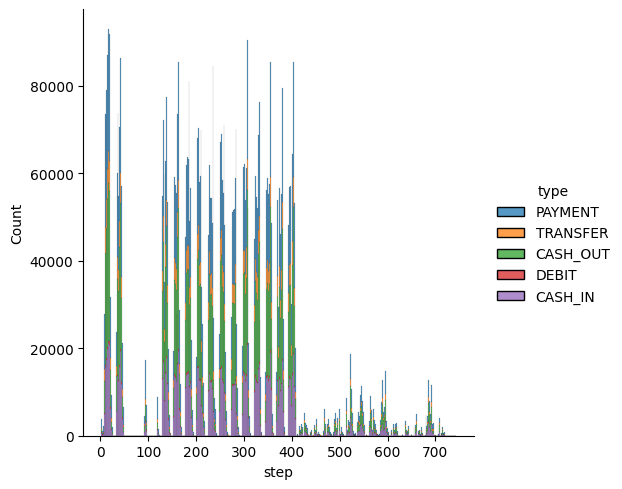

In [9]:
sns.displot(df, x="step", hue="type", multiple="stack")

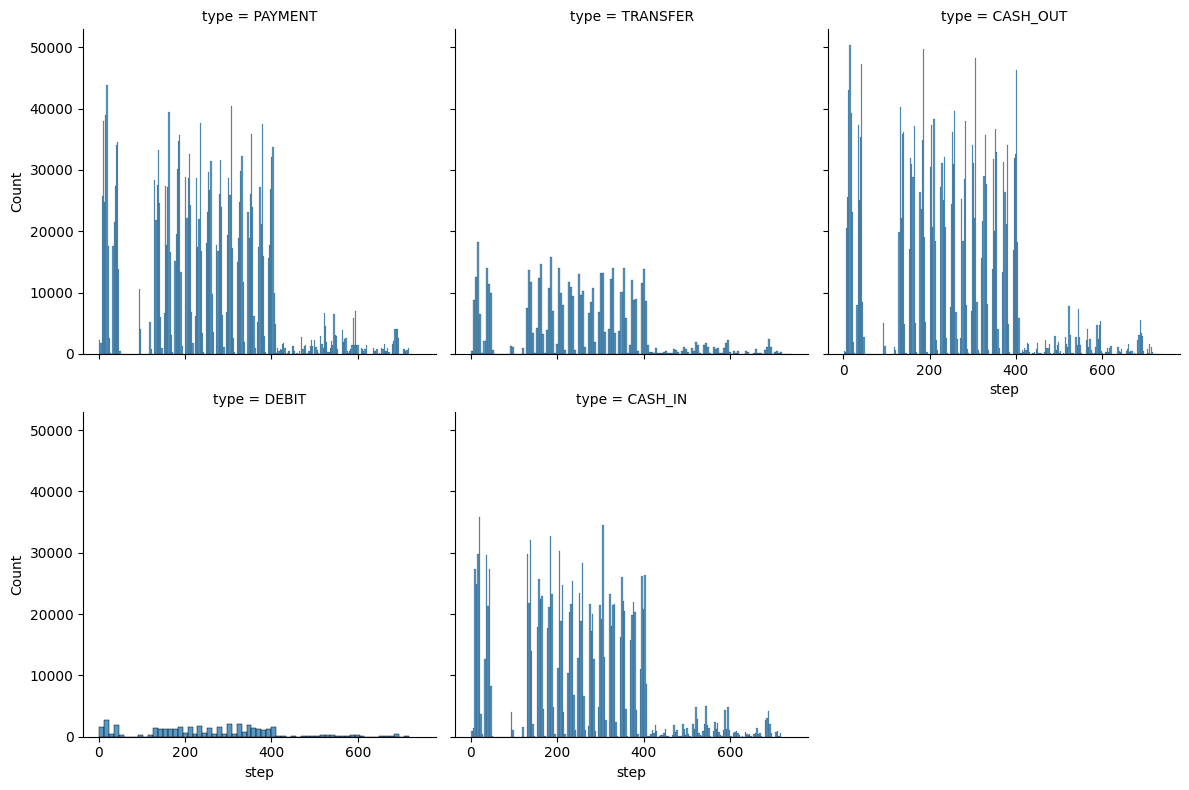

In [10]:
g = sns.FacetGrid(df, col="type", col_wrap=3, height=4)
g.map(sns.histplot, "step")
plt.show()


<Axes: xlabel='isFraud', ylabel='count'>

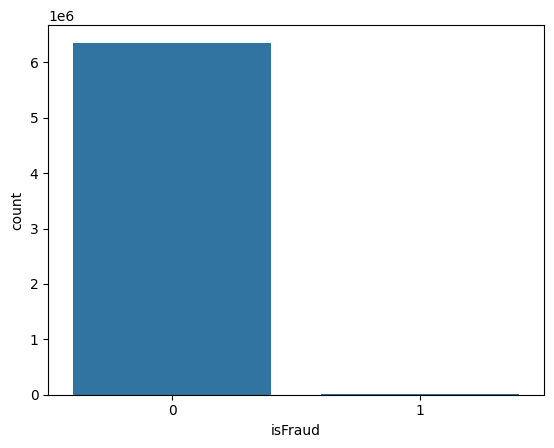

In [11]:
sns.countplot(x='isFraud',data=df)

Becuase the mmajority of transactions are not fraud, it would be very difficult to visualise this with a plot. A count is more sensible.

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

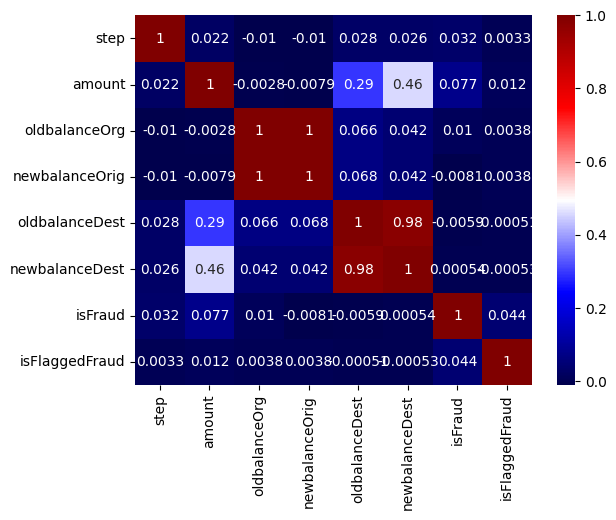

In [13]:
df_num = df.select_dtypes(include=['number'])
sns.heatmap(df_num.corr(), cmap = 'seismic', annot=True)

No feature has a very strong correlation with 'isFraud', as the values are all relatively close to zero. Absense of strong linear correleation with 'isFraud' suggests theat linear relationships are not strong predictors of fraud in this data set. Exploring non-linear models is an option.



In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [17]:
df['nameOrig']=le.fit_transform(df['nameOrig'])

In [18]:
df['nameDest']=le.fit_transform(df['nameDest'])

In [19]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [24]:
# Initialize the XGBoost classifier with the enable_categorical parameter set to True
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=42, enable_categorical=True)

# Fit the classifier to the training data with categorical features
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:

y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.85      0.90      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.93      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [27]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = xgb_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


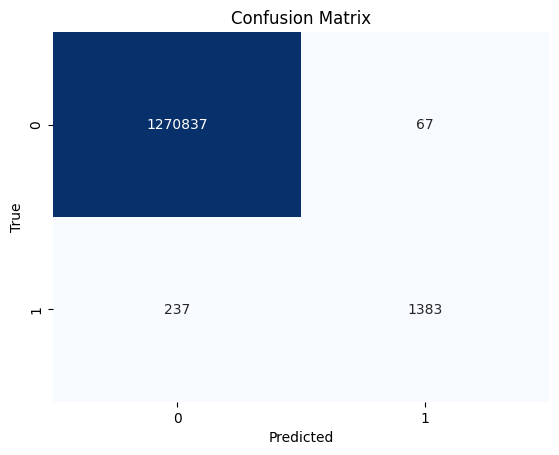

In [28]:
# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Get predicted probabilities for the positive class
y_scores = xgb_clf.predict_proba(X_test)[:, 1]


In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)


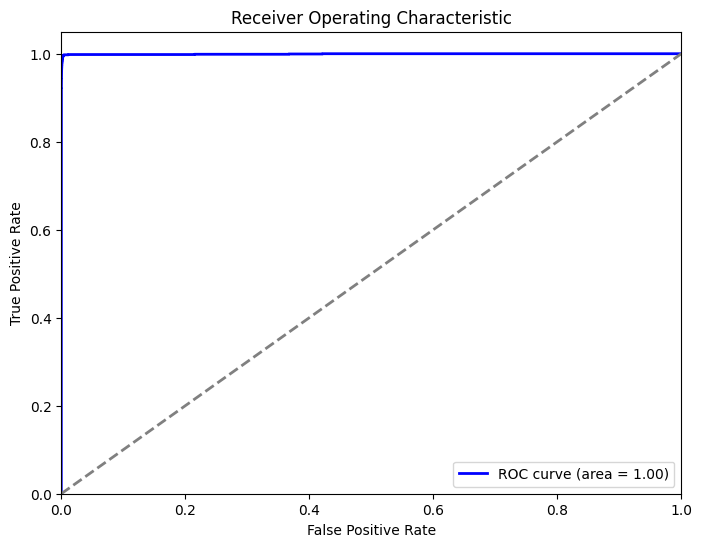

In [31]:

plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()


Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
pred_lr = lr.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.78      0.43      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.71      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524

